In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [2]:
pd.set_option('display.max_colwidth', None)  # 전체 열 너비를 무제한으로 설

# id,title,content,likes,url,author,views,created_at,updated_at,조회수
df_post = pd.read_csv("wh/data/코나 화재/naver_cafe_posts.csv")

# post_id,cmt_content,cmt_author,cmt_created_at
df_comment = pd.read_csv("wh/data/코나 화재/naver_cafe_comments.csv")



In [3]:
num_post = 200
# df_post의 likes가 가장 큰 것 10개
df_post_top10 = df_post.sort_values(by='likes', ascending=False).head(num_post)

# df_post_top10의 id와 likes를 list로 저장
post_id_list = df_post_top10['id'].tolist()
print(post_id_list)


[1511541, 505585, 569011, 761054, 655521, 576422, 1527319, 522350, 515470, 512987, 651267, 1298021, 1267502, 513770, 1530462, 516662, 1132044, 653895, 1531857, 635927, 504925, 503061, 516933, 358514, 599727, 506137, 512111, 514735, 527667, 468964, 525392, 566766, 649674, 1491802, 560309, 1525533, 514474, 956825, 505142, 1526658, 653873, 1503828, 565838, 622507, 652023, 1530082, 515116, 1366761, 526129, 1526344, 578339, 560291, 635370, 1533906, 513921, 526989, 1134146, 513046, 393039, 1533597, 820865, 502016, 559284, 521316, 565641, 505127, 1530523, 1386688, 524431, 567053, 724048, 754933, 516576, 1534992, 653586, 514765, 513955, 783406, 895989, 558387, 1534390, 561184, 563668, 1533858, 523283, 516685, 516346, 1098888, 513967, 562167, 576646, 1529463, 719621, 1026021, 514787, 354302, 513278, 1299387, 1526052, 760657, 635524, 513771, 1527596, 1527811, 1340730, 513786, 1524968, 561767, 556026, 513845, 513944, 1505665, 468956, 1498126, 558181, 522411, 566257, 354282, 1182820, 535834, 51320

In [4]:
# df_comment에서 post_id가 post_id_list[0]에 있는 것만 추출
df_comment_top10 = df_comment[df_comment['post_id'].isin(post_id_list)]

In [5]:
print(df_comment_top10)

       post_id  \
123    1119690   
124    1119690   
125    1119690   
126    1119690   
127    1119690   
...        ...   
38235  1491802   
38236  1491802   
38237  1491802   
38238  1491802   
38239  1491802   

                                                                                                                                                                                                                         cmt_content  \
123                                                                                                                                                                                                             영상보고 정리하신건가요? 수고하셨네요   
124                                                                                    영상은 참고한 자료 중에 하나일 뿐 입니다. 그리고 간혹 너 전기차 안타봤지 이러시는 분이 있는데 아이오닉6 풀옵션 전기차 차주 입니다. 전기차는 타보시면 전기차의 장점이 있습니다. 전기차는 저도 좋아합니다. 하지만 리튬배터리는 제 기준에서는 아닙니다.   
125                                                                                    

In [6]:

def get_comment(post_id, df_comment):
    comments = df_comment[df_comment['post_id'] == post_id]
    return comments


       post_id  \
14178   522350   
14179   522350   
14180   522350   
14181   522350   
14182   522350   
...        ...   
14272   522350   
14273   522350   
14274   522350   
14275   522350   
14276   522350   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2214451652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])
/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2214451652.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  comments = comments.resample('10T').size().cumsum()


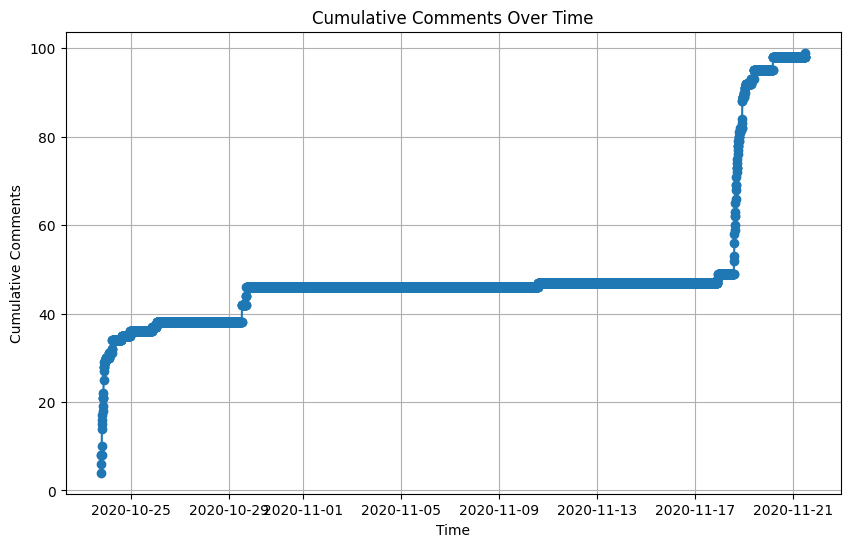

In [7]:
comments = get_comment(post_id_list[7], df_comment)

print(comments)

# 1. cmt_created_at을 datetime 형식으로 변환
comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])

# 2. 10분 간격으로 시간 그룹화
comments.set_index('cmt_created_at', inplace=True)
comments = comments.resample('10T').size().cumsum()

# 3. 누적 댓글 수 계산
comments = comments.reset_index()

# 4. 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(comments['cmt_created_at'], comments[0], marker='o')
plt.xlabel('Time')
plt.ylabel('Cumulative Comments')
plt.title('Cumulative Comments Over Time')
plt.grid(True)
plt.show()

In [8]:
import plotly.express as px

for i in range(190, num_post):
    comments = get_comment(post_id_list[i], df_comment)
 
    # 1. cmt_created_at을 datetime 형식으로 변환
    comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])

    # 2. 10분 간격으로 시간 그룹화 (min 사용)
    comments.set_index('cmt_created_at', inplace=True)
    comments = comments.resample('10min').size().cumsum()

    # 3. 누적 댓글 수 계산
    comments = comments.reset_index()

    # 4. plotly로 그래프 그리기
    fig = px.line(comments, x='cmt_created_at', y=0, markers=True,
                labels={'cmt_created_at': 'Time', '0': 'Cumulative Comments'},
                title='Cumulative Comments Over Time')

    fig.show()

    # 그림 저장하기
    fig.write_html(f"분석/comments_{i}.html")
    url = df_post[df_post['id'] == post_id_list[i]]['url']
    print(url)
    print(type(url))  # Series
    # url 뒤에 ... 안나오게 출력
    print(url.to_string(index=False))

/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments['cmt_created_at'] = pd.to_datetime(comments['cmt_created_at'])


2363    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-01-312022-07-31&media=0&sortBy=date&articleid=917910&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-01-312022-07-31&media=0&sortBy=date&articleid=917910&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2385    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-01-312022-07-31&media=0&sortBy=date&articleid=903232&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-01-312022-07-31&media=0&sortBy=date&articleid=903232&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



735    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=27&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513067&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=27&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513067&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



734    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=27&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513076&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=27&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513076&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1235    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2019-07-312020-01-31&media=0&sortBy=date&articleid=364742&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2019-07-312020-01-31&media=0&sortBy=date&articleid=364742&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



728    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=27&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513106&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=27&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2020-07-312021-01-31&media=0&sortBy=date&articleid=513106&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



105    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1034940&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2022-07-312023-01-31&media=0&sortBy=date&articleid=1034940&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1309    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=4&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2024-07-312024-08-30&media=0&sortBy=date&articleid=1526019&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=4&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2024-07-312024-08-30&media=0&sortBy=date&articleid=1526019&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2334    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2023-01-312023-07-31&media=0&sortBy=date&articleid=1187172&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=2&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2023-01-312023-07-31&media=0&sortBy=date&articleid=1187172&referrerAllArticles=true


/var/folders/v4/6tjs7h4921v9vrm_844m1clw0000gn/T/ipykernel_7989/2065671640.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1225    https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2019-07-312020-01-31&media=0&sortBy=date&articleid=372142&referrerAllArticles=true
Name: url, dtype: object
<class 'pandas.core.series.Series'>
https://cafe.naver.com/ca-fe/ArticleRead.nhn?clubid=21771803&page=1&userDisplay=50&inCafeSearch=true&searchBy=0&query=%EC%BD%94%EB%82%98+%ED%99%94%EC%9E%AC&includeAll=&exclude=&include=&exact=&searchdate=2019-07-312020-01-31&media=0&sortBy=date&articleid=372142&referrerAllArticles=true
